<a href="https://colab.research.google.com/github/satani99/qa_system/blob/main/RoBERTa_SQuAD_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 5.1 MB/s 
     |████████████████████████████████| 212 kB 58.7 MB/s 
     |████████████████████████████████| 182 kB 55.2 MB/s 
     |████████████████████████████████| 132 kB 49.0 MB/s 
     |████████████████████████████████| 127 kB 69.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [3]:
from datasets import get_dataset_config_names 

domains = get_dataset_config_names('adversarial_qa')
domains

['adversarialQA', 'dbidaf', 'dbert', 'droberta']

In [5]:
from datasets import load_dataset

adv_qa = load_dataset("adversarial_qa", name="droberta")

Generating train split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset adversarial_qa downloaded and prepared to /root/.cache/huggingface/datasets/adversarial_qa/droberta/1.0.0/92356be07b087c5c6a543138757828b8d61ca34de8a87807d40bbc0e6c68f04b. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
print(adv_qa["train"]['answers'][1])

{'text': ["his Légion d'honneur star"], 'answer_start': [458]}


In [8]:
import pandas as pd 

dfs = {split: dset.to_pandas() for split, dset in adv_qa.flatten().items()} 

for split, df in dfs.items():
  print(f"Number of questions in {split}: {df['id'].nunique()}")

Number of questions in train: 10000
Number of questions in validation: 1000
Number of questions in test: 1000


In [9]:
qa_cols = ['title', 'question', 'answers.text', 
           'answers.answer_start', 'context']
sample_df = dfs["train"][qa_cols].sample(2, random_state=42)
sample_df

,title,question,answers.text,answers.answer_start,context
6252,Aspirated_consonant,What besides English can have the aspiration?,[In some languages],[0],"In some languages, such as English, aspiration..."
4684,Party_leaders_of_the_United_States_House_of_Re...,what is the job of a floor leader?,[devising and implementing his party's strateg...,[344],"A party's floor leader, in conjunction with ot..."


In [10]:
start_idx = sample_df["answers.answer_start"].iloc[0][0]
end_idx = start_idx + len(sample_df["answers.text"].iloc[0][0])
sample_df["context"].iloc[0][start_idx:end_idx]

'In some languages'

In [15]:
import matplotlib.pyplot as plt

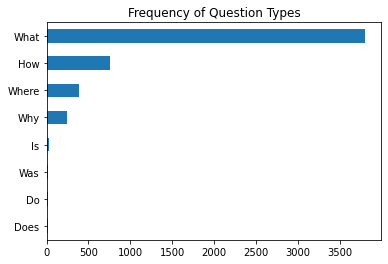

In [16]:
counts = {}
question_types = ["What", "How", "Is", "Does", "Do", "Was", "Where", "Why"]

for q in question_types:
  counts[q] = dfs["train"]["question"].str.startswith(q).value_counts()[True]

pd.Series(counts).sort_values().plot.barh()
plt.title("Frequency of Question Types")
plt.show()

In [17]:
for question_type in ["What", "How", "Where"]:
  for question in (
      dfs["train"][dfs["train"].question.str.startswith(question_type)]
      .sample(n=3, random_state=42)['question']):
    print(question)

What is unique about this language?
What is the third type of dog tail shape mentioned?
What phrase shows the author's bias against heresy?
How have classrooms changed since the 70s?
How is YouTube Red different from the regular streaming service?
How does Carcavallo characterize his demonstrations?
Where could you find someone who had 4 professions?
Where do Korean Presbyterians not have their own independent churches?
Where is Iran?
